# Project Report #
## About Dataset ##
I decided to choose the [Titanic data](https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download) just out of curiosity.
Data contains the demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Description of the data can be found [here](https://www.kaggle.com/c/titanic/data)

## Questions  ##
* How the survival of the titanic boat passenger is related to his **sex**, **age**? In general we can assume that Females were given priority over Males in the rescue process.   
* Do other factor **pcalss**(Passenger Class) affect the survival rate ?

## Data Wrangling  ##


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data_file = 'titanic_data.csv'
# reading data file
titanic = pd.read_csv(data_file)
# Top 5 rows of titanic
print titanic.head(5)
# High level descriptors of the data
titanic.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Data ###
The `describe(titanic)` gives some important information about the data like count, mean, min, max, standard deviation of every column.
Looking into the **Age** columns in output above, we can see that count is `714` and for others it is `891`. So there are missing cells in Age. As **Age** can be an important factor influencing the survival, so we can't ignore it. We should fill some value in all the empty cells of **Age** column. Here , we will put median in emply cells. Pandas fillna function can be used in this scenario. 


In [2]:
# Fill empty cells of Age column with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


After filling empty cells, we can see that **Age** column count is now 891.


### Dealing with non numberic data ###
We have many columns with non-numeric data **Name** , **Sex**, **Ticket**, **Cabin** and **Embarked**. We can ignore **Name** , **Ticket**, **Passengerid**, **Fare**  and **Cabin** columns as enough information can't be extracted from these columns. For example **Name** column won't give any information if we don't know which Name corresponds to rich or poor people.
**Sex** column is non-numeric but it is an important column. We can assume that Females were given priority over Males while rescuing. So to validate this hypothesis, we will keep this column. As it is good practice to convert values to numeric data so that we can do mathematical operations, we will convert **Sex** column to numeric value ( Male = 0 , Female =1 ).
   

In [3]:
# First delete column Name, Ticket, Cabin
titanic = titanic.drop('Name', 1)
titanic = titanic.drop('Ticket', 1)
titanic = titanic.drop('Cabin', 1)
titanic = titanic.drop('PassengerId', 1)
titanic = titanic.drop('Fare', 1)
# Replacing male with 0 and female with 1 in Sex column
print(titanic["Sex"].unique())
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

['male' 'female']


Similarly we will convert **Embarked** column. First lets what all unique values are there in **Embarked** column.

In [4]:
print(titanic["Embarked"].unique())

['S' 'C' 'Q' nan]


Now lets see which value is most common in the **Embarked** column.


In [5]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As 'S' is most common, it is good to assign 'S' to cells with missing values. And then we will do the numeric substitution for all the values. 'S' -> 0, 'C' -> 1, 'Q' -> 2

In [6]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

In [7]:
print(titanic["Embarked"].unique())

[0 1 2]


Lets do describe now

In [8]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


Even now **Sex** and **Embarked** column is not visible in the describe.
Lets see the dtype of both the columns' value.

In [9]:
print titanic['Sex'].dtype
print titanic['Embarked'].dtype

object
object


For describe to work on **Sex** and **Embarked** columns, the dtype should be int.
So now lets convert the dtype using `astype(np.int64)`

In [10]:
titanic['Embarked'] = titanic['Embarked'].astype(np.int64)
titanic['Sex'] = titanic['Sex'].astype(np.int64)

Lets do describe again

In [11]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


Now **Sex** and **Embarked** columns are also "described".

## Explore ##
Now lets do some exploration on the data.
### Covariance ###


In [12]:
titanic.cov()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,0.236772,-0.137703,0.126376,-0.411226,-0.018954,0.032017,0.033038
Pclass,-0.137703,0.699015,-0.052712,-3.699927,0.076599,0.012429,0.024289
Sex,0.126376,-0.052712,0.228475,-0.505098,0.060422,0.094584,0.035419
Age,-0.411226,-3.699927,-0.505098,169.512498,-3.349525,-1.810133,-0.075853
SibSp,-0.018954,0.076599,0.060422,-3.349525,1.216043,0.368739,-0.042032
Parch,0.032017,0.012429,0.094584,-1.810133,0.368739,0.649728,-0.040307
Embarked,0.033038,0.024289,0.035419,-0.075853,-0.042032,-0.040307,0.404081


### Plotting ##

### Age vs Survival ###

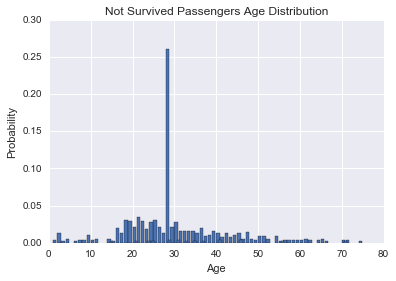

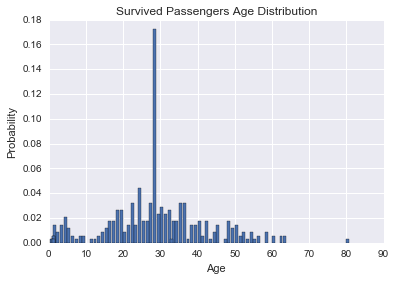

In [16]:
# print plots inline
%matplotlib inline
# Beautify the plot
import seaborn as sns
import matplotlib.patches as mpatches

# column - column that should be taken to find the probability
# survived - 1 if the passenger survived otherwise 0
# plot_title - Title of the bar plot

def group_data(column, survived):
    column_list = list(titanic.groupby('Survived')[column].value_counts()[survived].keys())
    total = float(sum(titanic.groupby('Survived')[column].value_counts()[survived].values))
    probability = list(titanic.groupby('Survived')[column].value_counts()[survived].values/total)
    return column_list,probability

def plot_bar(x, y, title, x_label, y_label):
    plt.bar(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
survived_ages, probability = group_data('Age', 0)
plot_bar(survived_ages, probability, 'Not Survived Passengers Age Distribution', 'Age', 'Probability')


survived_ages, probability = group_data('Age', 1)
plot_bar(survived_ages, probability, 'Survived Passengers Age Distribution', 'Age', 'Probability')


Even though the probability of not surviving at around age 30 is higher than probability of not surviving at other ages, we can't conclude anything because same is true for surviving passengers( probability of surviving at around age 30 is much hiher than probability of surviving at other ages). This is happening because the average age of person boarding the ship is 29. So most of the people are 26-31 years old. 

In [17]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


### Sex vs Survival ###

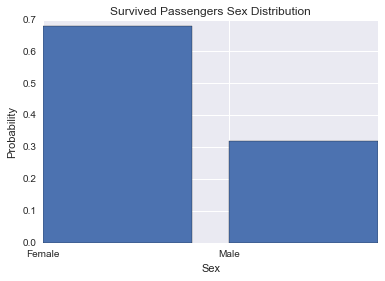

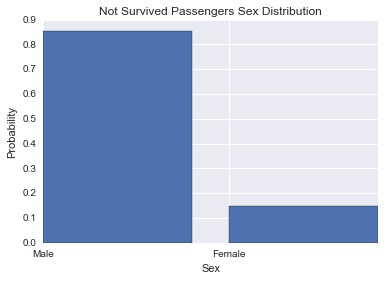

In [21]:
survived_sex, probability = group_data('Sex', 1)
plt.bar(range(len(probability)),probability)
plt.xticks(range(len(survived_sex)),['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Probability')
plt.title('Survived Passengers Sex Distribution')
plt.show()


survived_sex, probability = group_data('Sex', 0)
plt.bar(range(len(probability)),probability)
plt.xticks(range(len(survived_sex)),['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Probability')
plt.title('Not Survived Passengers Sex Distribution')
plt.show()


As you can see here that the probability of survival is high for females. Lets see the correlation between the sex and survived.


In [15]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,-0.078665
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,1.000000


As you can see above the correlation coeff between **Sex** and **Survived** is `0.543351` which is quite high comparing it with other columns. It is quite possible that females were given priority over males while rescuing.

### Pclass vs Survival ###

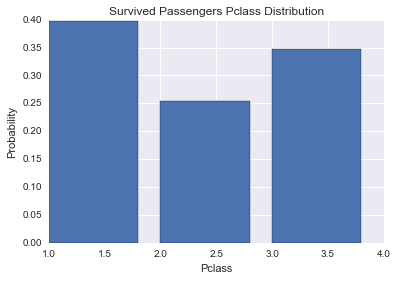

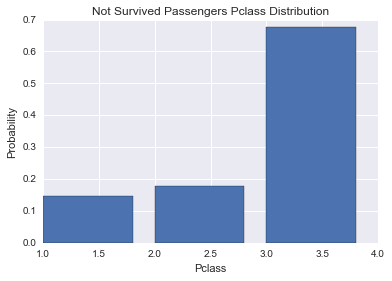

In [23]:
survived_pclass, probability = group_data('Pclass', 1)
plot_bar(survived_pclass, probability, 'Survived Passengers Pclass Distribution', 'Pclass', 'Probability' )
survived_pclass, probability = group_data('Pclass', 0)
plot_bar(survived_pclass, probability, 'Not Survived Passengers Pclass Distribution', 'Pclass', 'Probability' )


Out of all the survived passengers 40% of the passengeres belonged to Pclass 1 and out of all non surviving passengers only 15 % of the passengers belonged to Pclass 1.
Correlation between the two is `-0.338481` which is negative.

## Conclusion ##

The high covariance between **Sex** and **Survived** and the higher probability of females Survivors can be seen as the indicator of preference given to Females over males while rescuing. Also we can see that the Pclass 1 was given preference over other Pclass while rescuing. Out of all the non surviving passengers, 70% of them belong to Pclass 3. We can conlcude that higher class passengers were given preference while rescuing. Or maybe high class passenger rooms were near to the deck. From this data, we were not able to find any correlation between **Age** and **Survived**. Other factors like **SibSp** and **Parch** can also influence the outcome but we haven't analysis their effect.